In [ ]:
# Data handling and numerical computations
import numpy as np

# Load MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Deep learning framework (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report



In [3]:
# Splitting into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [4]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [5]:
unique_classes = np.unique(y_train)
print("Unique labels:", unique_classes)
print("Number of classes:", len(unique_classes))

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


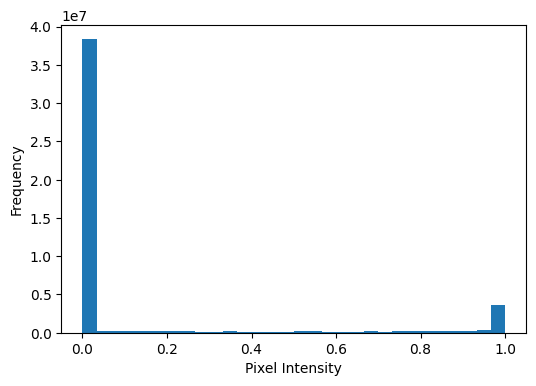

In [12]:
plt.figure(figsize=(6,4))
plt.hist(x_train.reshape(-1), bins=30)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

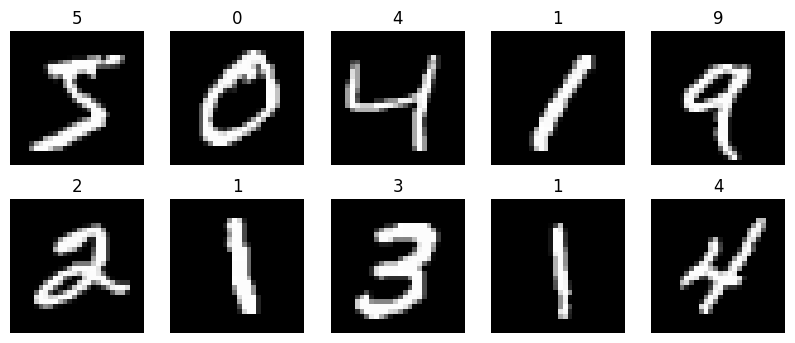

In [13]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

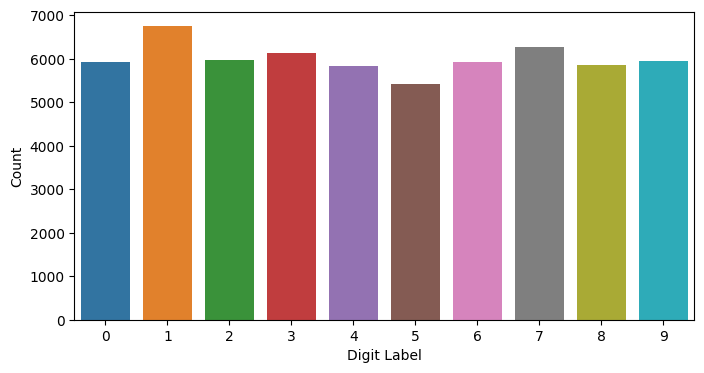

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x=y_train)
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()


In [14]:
# Convert pixel values from integers (0-255) to floats (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("After normalization:")
print("Training data min:", x_train.min(), "max:", x_train.max())
print("Testing data min:", x_test.min(), "max:", x_test.max())

After normalization:
Training data min: 0.0 max: 0.003921569
Testing data min: 0.0 max: 0.003921569


In [15]:
# Reshape training and testing images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("Training data shape after reshape:", x_train.shape)
print("Testing data shape after reshape:", x_test.shape)

Training data shape after reshape: (60000, 28, 28, 1, 1)
Testing data shape after reshape: (10000, 28, 28, 1, 1)


In [16]:
# Define the CNN architecture
model = Sequential([
    # First Conv + Pool block
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Second Conv + Pool block
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output Layer (10 classes for digits 0–9)
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1769743332.440758      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1769743332.444428      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [17]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
# Train the model with validation split
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# Check what metrics are stored in history
print("History keys:", history.history.keys())

Epoch 1/10


I0000 00:00:1769743381.357107     114 service.cc:148] XLA service 0x7a561c00c3c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769743381.361522     114 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1769743381.361547     114 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1769743381.836026     114 cuda_dnn.cc:529] Loaded cuDNN version 90300


 33/422 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0897 - loss: 2.3028

I0000 00:00:1769743387.301594     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.3077 - loss: 1.9109 - val_accuracy: 0.8837 - val_loss: 0.4429
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7890 - loss: 0.6565 - val_accuracy: 0.9273 - val_loss: 0.2572
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8497 - loss: 0.4785 - val_accuracy: 0.9488 - val_loss: 0.1816
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8842 - loss: 0.3773 - val_accuracy: 0.9598 - val_loss: 0.1427
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9020 - loss: 0.3231 - val_accuracy: 0.9675 - val_loss: 0.1206
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9147 - loss: 0.2889 - val_accuracy: 0.9710 - val_loss: 0.1076
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9257 - loss: 0.2487 - val_accuracy: 0.9712 - val_loss: 0.0974
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9298 - loss: 0.2310 - val_accuracy: 0.9742 - va

In [20]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Test Accuracy: 0.9723
✅ Test Loss: 0.0852


In [21]:
# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


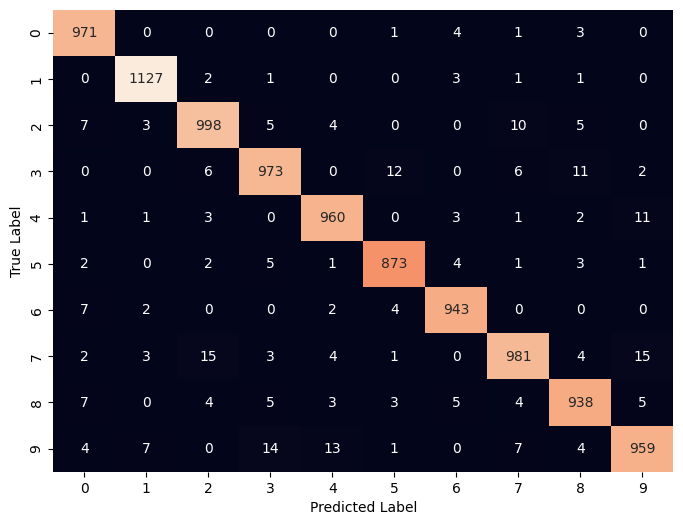

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap (clean version)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [24]:
# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
print("📊 Classification Report:\n")
print(report)

📊 Classification Report:

              precision    recall  f1-score   support

           0     0.9700    0.9908    0.9803       980
           1     0.9860    0.9930    0.9895      1135
           2     0.9689    0.9671    0.9680      1032
           3     0.9672    0.9634    0.9653      1010
           4     0.9726    0.9776    0.9751       982
           5     0.9754    0.9787    0.9771       892
           6     0.9802    0.9843    0.9823       958
           7     0.9694    0.9543    0.9618      1028
           8     0.9660    0.9630    0.9645       974
           9     0.9658    0.9504    0.9580      1009

    accuracy                         0.9723     10000
   macro avg     0.9722    0.9723    0.9722     10000
weighted avg     0.9723    0.9723    0.9723     10000



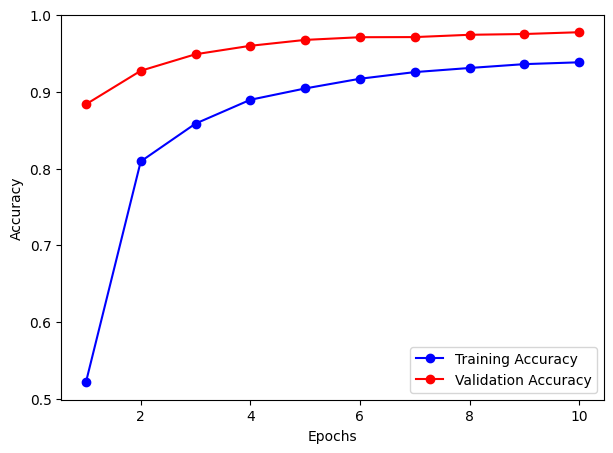

In [26]:
# Plot training vs validation accuracy (consistent with previous style)
def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(7, 5))
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Call the function
plot_accuracy(history)


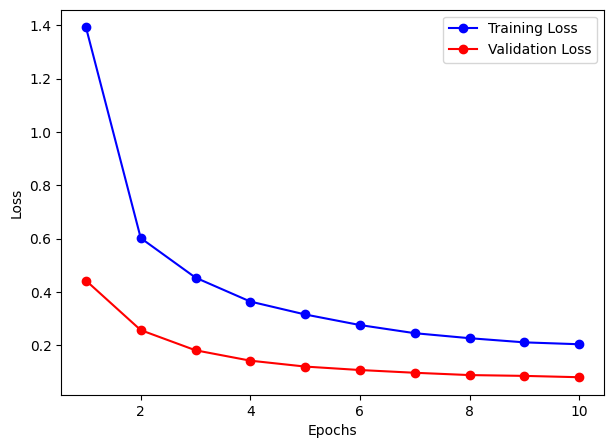

In [27]:
# Plot training vs validation loss (consistent with previous style)
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(7, 5))
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function
plot_loss(history)


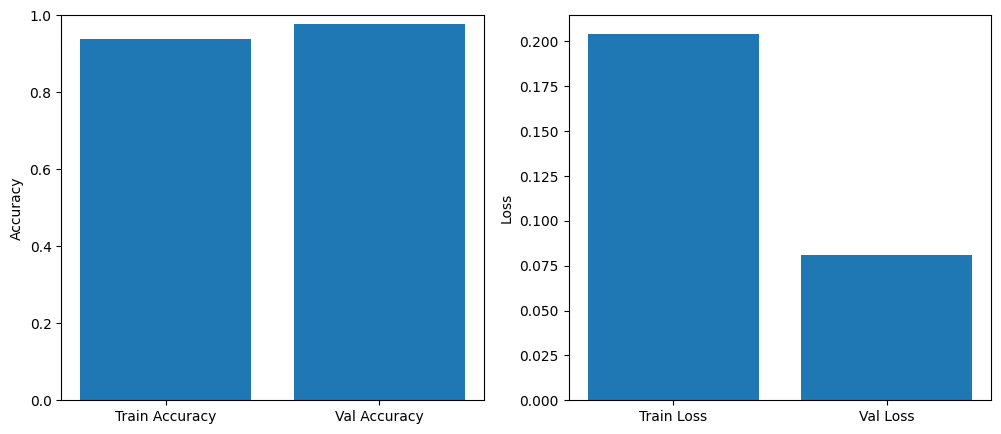

In [28]:
# Extract final accuracy and loss values
final_acc = [history.history['accuracy'][-1],
             history.history['val_accuracy'][-1]]

final_loss = [history.history['loss'][-1],
              history.history['val_loss'][-1]]

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Accuracy Bar Plot
ax[0].bar(['Train Accuracy', 'Val Accuracy'], final_acc)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel("Accuracy")

# Loss Bar Plot
ax[1].bar(['Train Loss', 'Val Loss'], final_loss)
ax[1].set_ylabel("Loss")

plt.show()


Total Correctly Classified Images: 9723


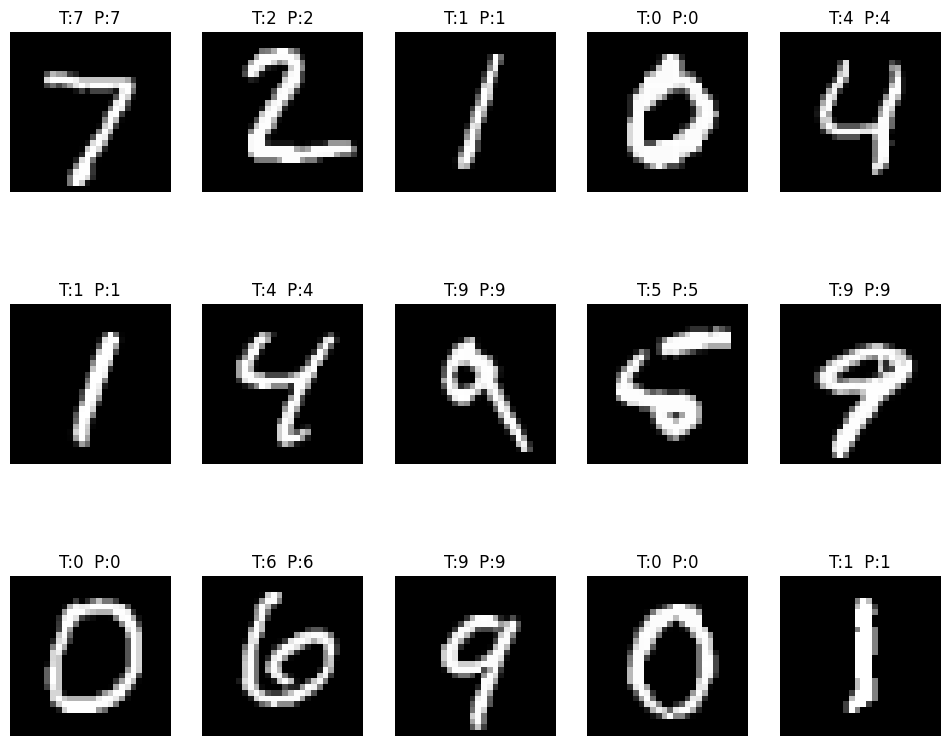

In [29]:
# Find correctly classified examples
correct_idx = np.where(y_pred == y_test)[0]

print("Total Correctly Classified Images:", len(correct_idx))

# Show first 15 correctly classified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(correct_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_test[idx]}  P:{y_pred[idx]}")
    plt.axis('off')

plt.show()


Total Misclassified Images: 277


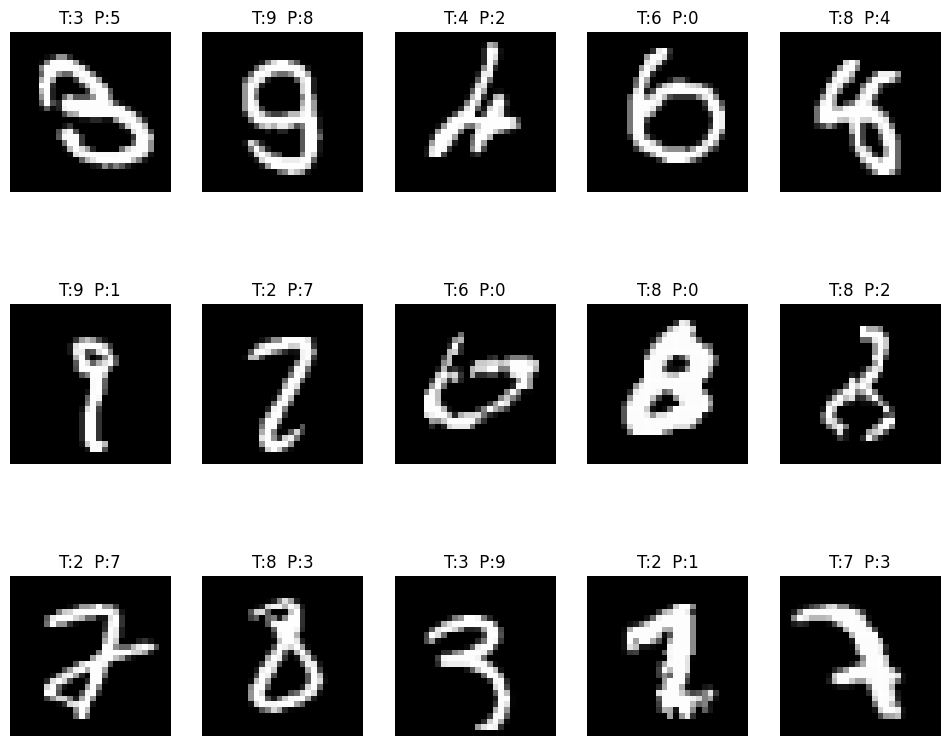

In [30]:
# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]

print("Total Misclassified Images:", len(misclassified_idx))

# Show first 15 misclassified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_test[idx]}  P:{y_pred[idx]}")
    plt.axis('off')

plt.show()


In [31]:
# Save the trained model
model.save("mnist_cnn_model.h5")

# Print confirmation
print("✅ Model has been saved successfully as 'mnist_cnn_model.h5'")

✅ Model has been saved successfully as 'mnist_cnn_model.h5'
